In [1]:
from main import *
import pandas as pd
import matplotlib.pyplot as plt
import os
import re
from datetime import date, datetime

In [2]:
topic = os.getenv("TOPIC")

max_pages = os.getenv("MAX_PAGES")

mode = os.getenv("MODE")

load_path = os.getenv("LOAD_PATH")

In [3]:
# allow running the notebook interactively as well
if mode is None:
    mode = "extract_and_save"
if topic is None:
    topic = "Systems biology"
try:
    max_pages = int(max_pages)
except:
    max_pages = None

In [4]:
today = date.today().strftime("%B %d, %Y")
today_save = date.today().strftime("%B_%d_%Y")

In [5]:
# file_settings for TSV
delim = "\t"
ext = "tsv"

In [6]:
if mode == "extract":
    data = extract_all_data(topic=topic, max_pages=max_pages)
    data_source_date = today

elif mode == "extract_and_save":
    data = extract_all_data(topic=topic, max_pages=max_pages)
    f_name = f"data/bio_tools_{topic.lower().replace(' ', '_')}_{today_save}.{ext}"
    data.to_csv(f_name, sep=delim, index=False)
    data_source_date = today
    
elif mode == "load":
    data = pd.read_csv(load_path, sep="\t")
    fname = os.path.basename(load_path).replace(f'.{ext}', '')

    raw = fname.split('bio_tools_', 1)[-1].replace('_', ' ')

    parts = raw.split()
    if len(parts) >= 3:
        month, day, year = parts[-3:]
        try:
            data_source_date = datetime.strptime(f"{month} {day} {year}", "%B %d %Y") \
                                 .strftime("%B %d, %Y")
        except ValueError:
            data_source_date = f"{month} {day}, {year}"
    else:
        data_source_date = today

In [7]:
from IPython.display import Markdown, display, HTML

In [8]:
display(Markdown(f"""
<div style="display:inline-flex; align-items:center; gap:10px; float:right;">
  <a href="https://biodata.pt/">
    <img src="./images/elixir_node_portugal.png" width="190px" alt="ELIXIR Portugal Logo">
  </a>
  <a href="https://elixir-slovenia.org/en/elixir-slovenia-home-page/">
    <img src="./images/elixir_node_slovenia.png" width="80px" alt="ELIXIR Slovenia Logo">
  </a>
</div>
"""))




<div style="display:inline-flex; align-items:center; gap:10px; float:right;">
  <a href="https://biodata.pt/">
    <img src="./images/elixir_node_portugal.png" width="190px" alt="ELIXIR Portugal Logo">
  </a>
  <a href="https://elixir-slovenia.org/en/elixir-slovenia-home-page/">
    <img src="./images/elixir_node_slovenia.png" width="80px" alt="ELIXIR Slovenia Logo">
  </a>
</div>


In [9]:
display(Markdown(f"""

# BioTools {topic} Report

**Author:** Bruno Sá, Carissa Bleker, Anže Županič, Miguel Rocha               
**Date:** {today}  
**Data source:** bio.tools Web API ({data_source_date}) 

In this report we will analyze the data extracted from the BioTools database more specifically related to the topic '{topic}' using the bio.tools Web API.  
"""))


display(Markdown("---"))






# BioTools Systems biology Report

**Author:** Bruno Sá, Carissa Bleker, Anže Županič, Miguel Rocha               
**Date:** July 01, 2025  
**Data source:** bio.tools Web API (July 01, 2025) 

In this report we will analyze the data extracted from the BioTools database more specifically related to the topic 'Systems biology' using the bio.tools Web API.  


---

In [10]:
display(Markdown(f"""

**Automated Report**  
This notebook is **automatically generated** by querying the [bio.tools](https://bio.tools) Web API for the topic *{topic}*.  
All available data is fetched, programmatically parsed, plotted, and rendered in-line.  
Because the bio.tools schema is consistent across communities, you can adapt this exact code simply by changing the community identifier to produce reports for any other domain.
All available topics can be found in the [BioPortal - EDAM ](https://bioportal.bioontology.org/ontologies/EDAM?p=classes&conceptid=http%3A%2F%2Fedamontology.org%2Ftopic_0003).
                 


"""))

display(HTML('<div style="page-break-after: always;"></div>'))



**Automated Report**  
This notebook is **automatically generated** by querying the [bio.tools](https://bio.tools) Web API for the topic *Systems biology*.  
All available data is fetched, programmatically parsed, plotted, and rendered in-line.  
Because the bio.tools schema is consistent across communities, you can adapt this exact code simply by changing the community identifier to produce reports for any other domain.
All available topics can be found in the [BioPortal - EDAM ](https://bioportal.bioontology.org/ontologies/EDAM?p=classes&conceptid=http%3A%2F%2Fedamontology.org%2Ftopic_0003).
                 




In [11]:
total_tools_sysbio = data.shape[0]
total_tools_all = get_biotools_total_count()


In [12]:
# Horizontal rule
display(Markdown("---"))

# Summary paragraph
display(Markdown(
    f"""

## Tools Extraction

A total of {total_tools_sysbio} tools were extracted from the bio.tools database by filtering the topic '{topic}'.

As shown in the bar chart below, {total_tools_sysbio} out of {total_tools_all} total tools (≈ {total_tools_sysbio/total_tools_all*100:.1f} %) are tagged under *{topic}*.


"""
))


---



## Tools Extraction

A total of 553 tools were extracted from the bio.tools database by filtering the topic 'Systems biology'.

As shown in the bar chart below, 553 out of 30496 total tools (≈ 1.8 %) are tagged under *Systems biology*.




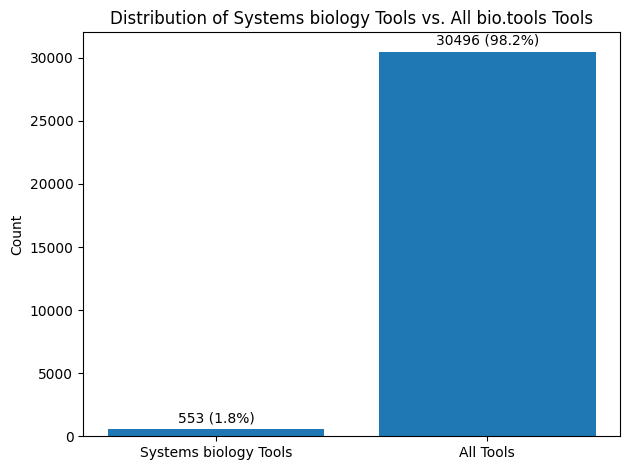

In [13]:
labels = [f'{topic} Tools', 'All Tools']
sizes = [total_tools_sysbio, total_tools_all]


# Calculate percentages
total = sum(sizes)
percentages = [size / total * 100 for size in sizes]

# Create the bar chart
plt.figure()
bars = plt.bar(labels, sizes)
plt.ylabel('Count')
plt.title(f'Distribution of {topic} Tools vs. All bio.tools Tools')

# Annotate each bar with its count and percentage
for bar, size, percentage in zip(bars, sizes, percentages):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + total * 0.01,
        f'{size} ({percentage:.1f}%)',
        ha='center',
        va='bottom'
    )

plt.tight_layout()
plt.show()


In [14]:
display(Markdown("---"))

items_str = [f' - [{n}](#{n})' for n in data.columns]
list_str = '\n'.join(items_str)

display(Markdown(
    f"""
# Attributes Analysis

In this section, we will analyze all the attributes of the tools related to '{topic}' extracted from the BioTools database:
{list_str}


> **Note:** Detailed definitions for each attribute are available in the [BioTools Curators Guide](https://biotools.readthedocs.io/en/latest/curators_guide.html).


"""
))



---


# Attributes Analysis

In this section, we will analyze all the attributes of the tools related to 'Systems biology' extracted from the BioTools database:
 - [name](#name)
 - [description](#description)
 - [homepage](#homepage)
 - [biotoolsID](#biotoolsID)
 - [biotoolsCURIE](#biotoolsCURIE)
 - [version](#version)
 - [otherID](#otherID)
 - [relation](#relation)
 - [function](#function)
 - [toolType](#toolType)
 - [topic](#topic)
 - [operatingSystem](#operatingSystem)
 - [language](#language)
 - [license](#license)
 - [collectionID](#collectionID)
 - [maturity](#maturity)
 - [cost](#cost)
 - [accessibility](#accessibility)
 - [elixirPlatform](#elixirPlatform)
 - [elixirNode](#elixirNode)
 - [elixirCommunity](#elixirCommunity)
 - [link](#link)
 - [download](#download)
 - [documentation](#documentation)
 - [publication](#publication)
 - [credit](#credit)
 - [owner](#owner)
 - [additionDate](#additionDate)
 - [lastUpdate](#lastUpdate)
 - [editPermission](#editPermission)
 - [validated](#validated)
 - [homepage_status](#homepage_status)
 - [elixir_badge](#elixir_badge)
 - [confidence_flag](#confidence_flag)


> **Note:** Detailed definitions for each attribute are available in the [BioTools Curators Guide](https://biotools.readthedocs.io/en/latest/curators_guide.html).




In [15]:
# Display the attributes analysis section

In [16]:
display(Markdown("---"))
display(Markdown(
    f"""

# Name

A total of {data['name'].nunique()} unique names were found for the tools related to '{topic}'.

"""
))

mini_report(data['name'], False)


---



# Name

A total of 553 unique names were found for the tools related to 'Systems biology'.



------------------------------------------------------------
Column name: name
------------------------------------------------------------
Total number of tags: 553
Number of empty tags: 0
Percentage of empty tags: 0.00%
Number of unique tags: 553
------------------------------------------------------------


In [17]:
display(Markdown(
    f"""

Any additionnal notes can be inserted here.

"""))



Any additionnal notes can be inserted here.



In [18]:
display(HTML('<div style="page-break-after: always;"></div>'))
display(Markdown("---"))
display(Markdown(
    f"""
# Description

A total of {data['description'].nunique()} unique descriptions were found for the tools related to '{topic}'.

"""
))

mini_report(data['description'], False)

---


# Description

A total of 553 unique descriptions were found for the tools related to 'Systems biology'.



------------------------------------------------------------
Column name: description
------------------------------------------------------------
Total number of tags: 553
Number of empty tags: 0
Percentage of empty tags: 0.00%
Number of unique tags: 553
------------------------------------------------------------


In [19]:
display(Markdown(
    f"""

Any additionnal notes can be inserted here.

"""))



Any additionnal notes can be inserted here.



In [20]:
display(HTML('<div style="page-break-after: always;"></div>'))
display(Markdown("---"))
display(Markdown(
    f"""
# Homepage

A total of {data['homepage'].nunique()} unique homepages were found for the tools related to '{topic}'.

"""
))

mini_report(data['homepage'], False)

---


# Homepage

A total of 549 unique homepages were found for the tools related to 'Systems biology'.



------------------------------------------------------------
Column name: homepage
------------------------------------------------------------
Total number of tags: 553
Number of empty tags: 0
Percentage of empty tags: 0.00%
Number of unique tags: 549
------------------------------------------------------------


In [21]:
display(Markdown(
    f"""

    
    
In order to check the availability of the homepage, we will use the check_urls function to check the status of the homepage.
Available (200), were not found (error 404), not acessible (several different errors) and timeout (no response in 2 seconds time).

"""))



    
    
In order to check the availability of the homepage, we will use the check_urls function to check the status of the homepage.
Available (200), were not found (error 404), not acessible (several different errors) and timeout (no response in 2 seconds time).



In [22]:
check_url_df = check_urls_parallel(data['homepage'], 50)     

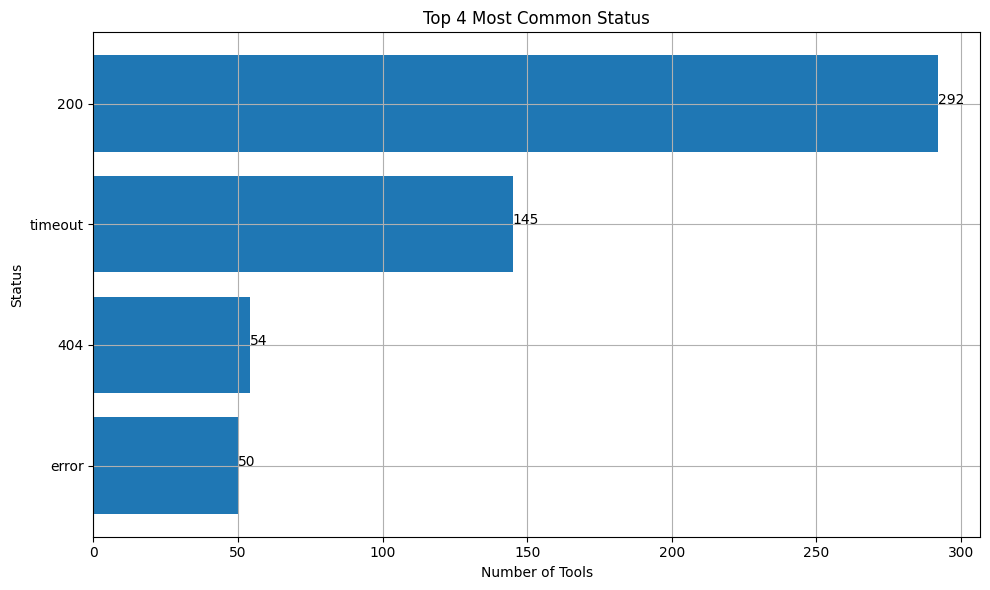

In [23]:
make_bar_graph(check_url_df['result'], 'Status', 4)
#mini_report(check_url_df['result'])

In [24]:
display(Markdown(
    f"""

Any additionnal notes can be inserted here.

"""))



Any additionnal notes can be inserted here.



In [25]:
display(HTML('<div style="page-break-after: always;"></div>'))
display(Markdown("---"))
display(Markdown(
        
    f"""
    
# BiotoolsID

A total of {data['biotoolsID'].nunique()} unique biotoolsIDs were found for the tools related to '{topic}'.

"""))

mini_report(data['biotoolsID'], False)

---


    
# BiotoolsID

A total of 553 unique biotoolsIDs were found for the tools related to 'Systems biology'.



------------------------------------------------------------
Column name: biotoolsID
------------------------------------------------------------
Total number of tags: 553
Number of empty tags: 0
Percentage of empty tags: 0.00%
Number of unique tags: 553
------------------------------------------------------------


In [26]:
display(Markdown(
    f"""

Any additionnal notes can be inserted here.

"""))



Any additionnal notes can be inserted here.



In [27]:
display(HTML('<div style="page-break-after: always;"></div>'))
display(Markdown("---"))
display(Markdown(
    f"""
# BioToolsCURIE
A total of {data['biotoolsCURIE'].nunique()} unique BioTools CURIEs were found for the tools related to '{topic}'.

"""))

mini_report(data['biotoolsCURIE'], False)

---


# BioToolsCURIE
A total of 553 unique BioTools CURIEs were found for the tools related to 'Systems biology'.



------------------------------------------------------------
Column name: biotoolsCURIE
------------------------------------------------------------
Total number of tags: 553
Number of empty tags: 0
Percentage of empty tags: 0.00%
Number of unique tags: 553
------------------------------------------------------------


In [28]:
display(Markdown(
    f"""

Any additionnal notes can be inserted here.

"""))



Any additionnal notes can be inserted here.



In [29]:
display(HTML('<div style="page-break-after: always;"></div>'))
display(Markdown("---"))
display(Markdown(
    f"""
# Version

A total of {(data['version'].apply(lambda x: len(x) == 0)).sum()} tools without a version.

The other tools have inconsistent version formats.

"""))

mini_report(data['version'], False) 

---


# Version

A total of 411 tools without a version.

The other tools have inconsistent version formats.



------------------------------------------------------------
Column name: version
------------------------------------------------------------
Total number of tags: 142
Number of empty tags: 411
Percentage of empty tags: 74.32%
------------------------------------------------------------


In [30]:
display(Markdown(
    f"""

Any additionnal notes can be inserted here.

"""))



Any additionnal notes can be inserted here.



In [31]:
version = data['version']
version = version[version.apply(len) > 0]

In [32]:
display(HTML('<div style="page-break-after: always;"></div>'))
display(Markdown("---"))
display(Markdown(
    f"""
# OtherID


"""))
mini_report(data['otherID'], False)

---


# OtherID




------------------------------------------------------------
Column name: otherID
------------------------------------------------------------
Total number of tags: 11
Number of empty tags: 542
Percentage of empty tags: 98.01%
------------------------------------------------------------


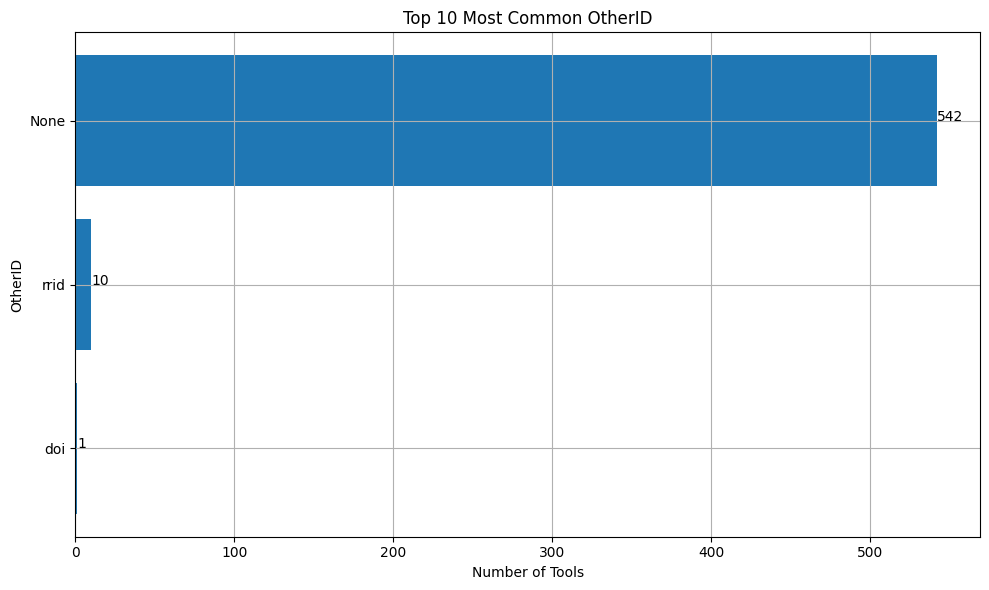

In [33]:
otherID = data['otherID']
otherID = otherID.apply(lambda x: x[0]['type'] if len(x) > 0 else None)
make_bar_graph(otherID, 'OtherID', 10)

In [34]:
display(Markdown(
    f"""

Any additionnal notes can be inserted here.

"""))



Any additionnal notes can be inserted here.



In [35]:
display(HTML('<div style="page-break-after: always;"></div>'))
display(Markdown("---"))
display(Markdown(
    f"""
# Relation

"""))
mini_report(data['relation'], False)

---


# Relation



------------------------------------------------------------
Column name: relation
------------------------------------------------------------
Total number of tags: 23
Number of empty tags: 530
Percentage of empty tags: 95.84%
------------------------------------------------------------


In [36]:
relation = data['relation']
relation_list = [t['biotoolsID'] for tool in relation for t in tool]

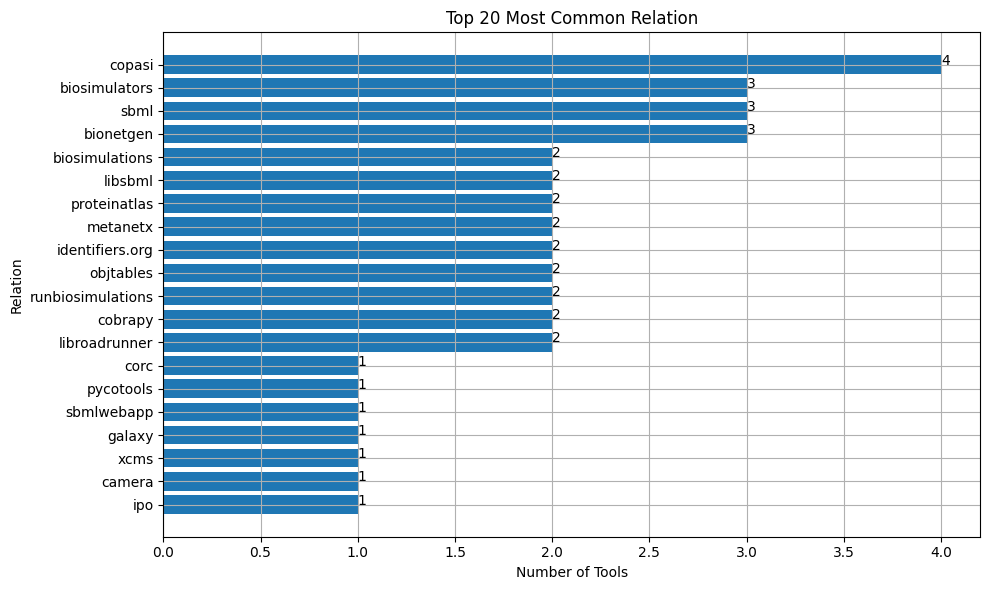

In [37]:
make_bar_graph(relation_list, 'Relation', 20)

In [38]:
display(Markdown(
    f"""

Any additionnal notes can be inserted here.

"""))



Any additionnal notes can be inserted here.



In [39]:
display(HTML('<div style="page-break-after: always;"></div>'))
display(Markdown("---"))
display(Markdown(
    f"""
# Function

This attribute describes the primary function of the tool, the input and output and the operation it performs.

Its importante to note that a single tool can have multiple operations

"""))

mini_report(data['function'], False)

---


# Function

This attribute describes the primary function of the tool, the input and output and the operation it performs.

Its importante to note that a single tool can have multiple operations



------------------------------------------------------------
Column name: function
------------------------------------------------------------
Total number of tags: 538
Number of empty tags: 15
Percentage of empty tags: 2.71%
------------------------------------------------------------


In [40]:
function = data['function']

In [41]:
display(Markdown(
    f"""

The bar graph below illustrates the distribution of tool functions associated with '{topic}'.

It's important to note that these fields primarily support interoperability; their limited availability can make automated workflow generation challenging.

"""))




The bar graph below illustrates the distribution of tool functions associated with 'Systems biology'.

It's important to note that these fields primarily support interoperability; their limited availability can make automated workflow generation challenging.



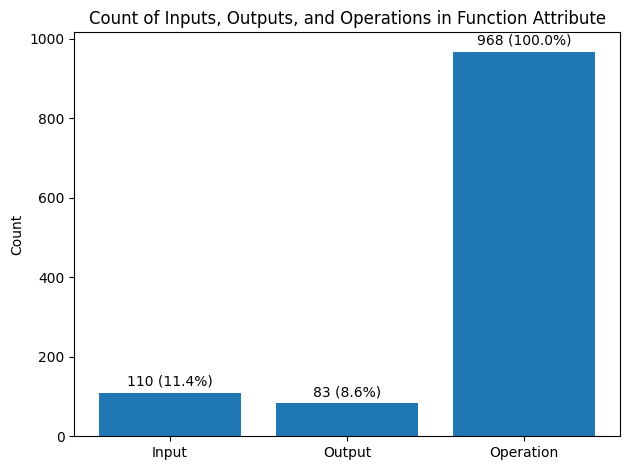

In [42]:
# Compute counts
n_inputs     = sum(len(tool.get('input',   [])) for tl in function for tool in tl)
n_outputs    = sum(len(tool.get('output',  [])) for tl in function for tool in tl)
n_operations = sum(len(tool.get('operation',[])) for tl in function for tool in tl)

# Prepare for plotting
categories  = ['Input', 'Output', 'Operation']
sizes       = [n_inputs, n_outputs, n_operations]
total_ops   = n_operations
percentages = [size / total_ops * 100 for size in sizes]

# Plot
plt.figure()
bars = plt.bar(categories, sizes)
plt.title('Count of Inputs, Outputs, and Operations in Function Attribute')
plt.ylabel('Count')

# Annotate each bar with “size (xx.x%)”
for bar, size, pct in zip(bars, sizes, percentages):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + total_ops * 0.01,           # little offset above the bar
        f'{size} ({pct:.1f}%)',
        ha='center',
        va='bottom'
    )

plt.tight_layout()
plt.show()

In [43]:
display(Markdown(
    f"""

Any additionnal notes can be inserted here.

"""))



Any additionnal notes can be inserted here.



In [44]:
display(HTML('<div style="page-break-after: always;"></div>'))
display(Markdown(
    f"""
# Function - Operation

The bar graph below illustrates the distribution of tool operations associated with '{topic}'.
"""))


# Function - Operation

The bar graph below illustrates the distribution of tool operations associated with 'Systems biology'.


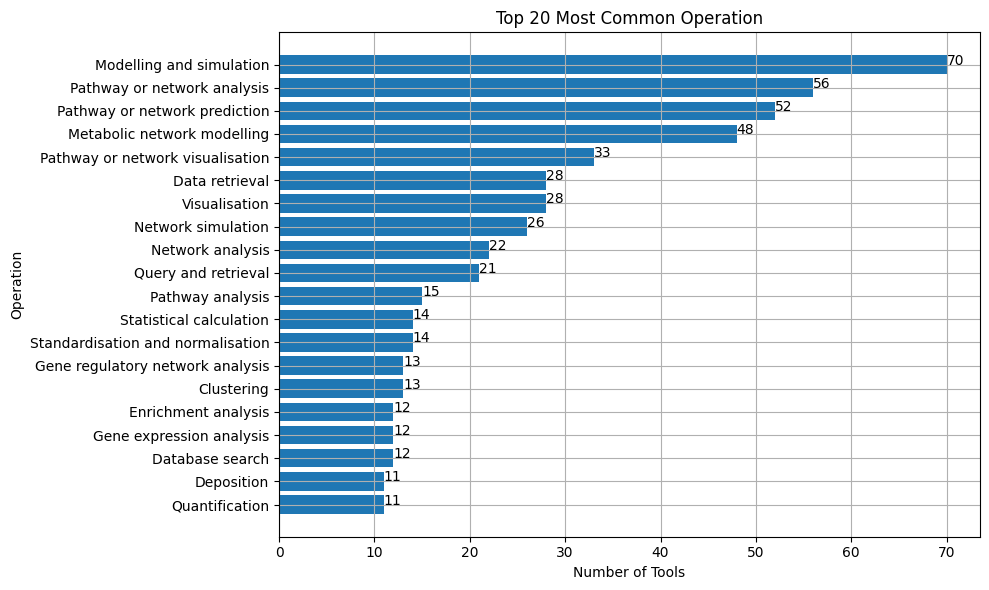

In [45]:
n_operations = sum(
    len(tool.get('operation', []))
    for tool_list in function
    for tool in tool_list
)
#function = function[data['function'].apply(len)> 0]
function_list = [term['term'] for tool in function for t in tool for term in t['operation']]
make_bar_graph(function_list, 'Operation', 20)


In [46]:
display(Markdown(
    f"""

Any additionnal notes can be inserted here.

"""))



Any additionnal notes can be inserted here.



In [47]:
display(HTML('<div style="page-break-after: always;"></div>'))
display(Markdown(
    f"""
# Function - Input

The bar graph below illustrates the distribution of tool inputs associated with '{topic}'.
"""))


# Function - Input

The bar graph below illustrates the distribution of tool inputs associated with 'Systems biology'.


In [48]:
n_inputs = sum(
    len(tool.get('input', []))
    for tool_list in function
    for tool in tool_list
)

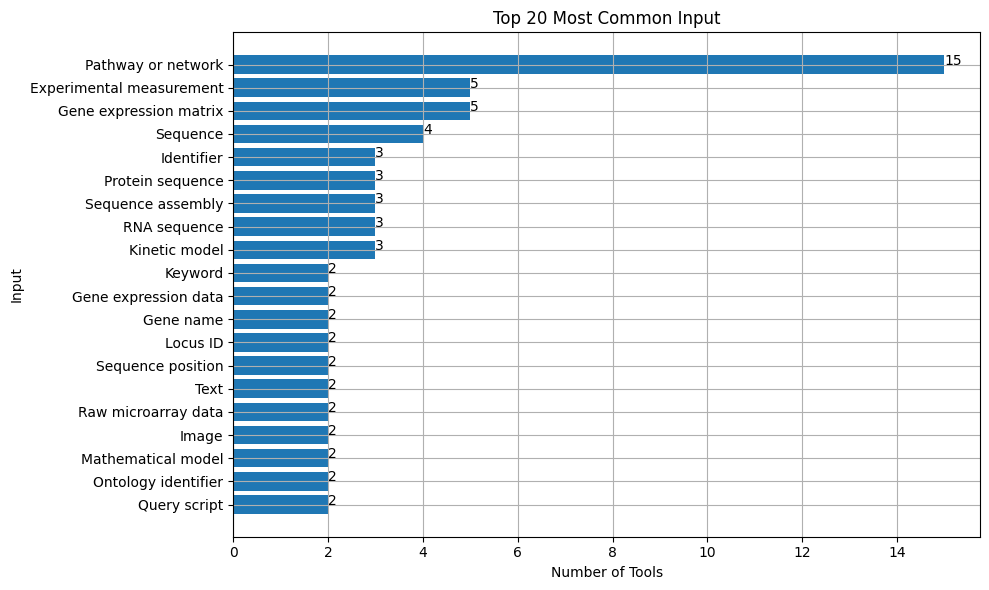

In [49]:
input_list = [
    inp['data']['term']
    for tool in function          # each cell
    for t    in tool               # each tool in that cell
    for inp  in t['input']         # each input dict in that tool
]

make_bar_graph(input_list, 'Input', 20)

In [50]:
display(Markdown(
    f"""

Any additionnal notes can be inserted here.

"""))



Any additionnal notes can be inserted here.



In [51]:
n_outputs = sum(
    len(tool.get('output', []))
    for tool_list in function
    for tool in tool_list
)

In [52]:
display(HTML('<div style="page-break-after: always;"></div>'))
display(Markdown(
    f"""
# Function - Output

The bar graph below illustrates the distribution of tool outputs associated with '{topic}'.
"""))


# Function - Output

The bar graph below illustrates the distribution of tool outputs associated with 'Systems biology'.


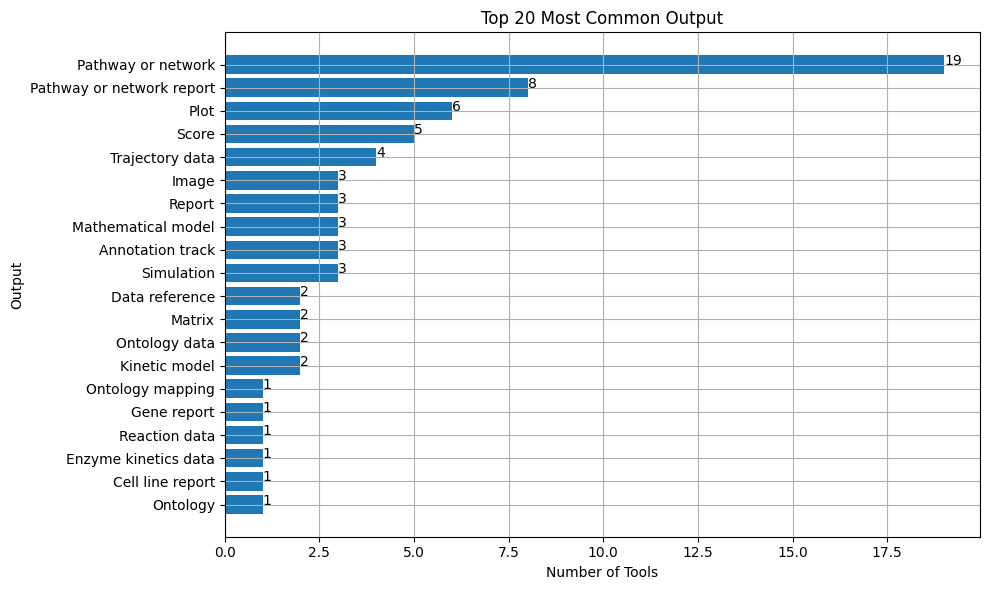

In [53]:
output_list = [
    out['data']['term']
    for tool in function
    for t    in tool
    for out  in t['output']
]

make_bar_graph(output_list, 'Output', 20)

In [54]:
display(Markdown(
    f"""

Any additionnal notes can be inserted here.

"""))



Any additionnal notes can be inserted here.



In [55]:
display(HTML('<div style="page-break-after: always;"></div>'))
display(Markdown("---"))
display(Markdown(
    f"""
# ToolType

"""))

mini_report(data['toolType'], False)

---


# ToolType



------------------------------------------------------------
Column name: toolType
------------------------------------------------------------
Total number of tags: 529
Number of empty tags: 24
Percentage of empty tags: 4.34%
------------------------------------------------------------


In [56]:
toolType = data['toolType']
toolType = toolType[data['toolType'].apply(len)> 0]

In [57]:
toolType_list = []

for tool in toolType:
    if len(tool) > 1:
        for t in tool:
            toolType_list.append(t)
    else:
        toolType_list.append(tool[0])

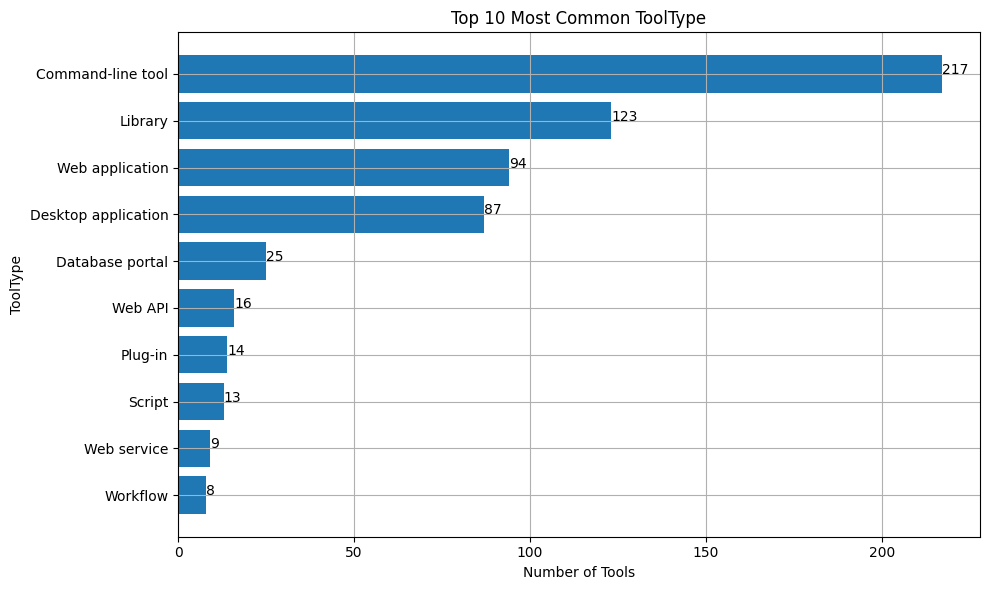

In [58]:
make_bar_graph(toolType_list, 'ToolType', 10)

In [59]:
display(Markdown(
    f"""

Any additionnal notes can be inserted here.

"""))



Any additionnal notes can be inserted here.



In [60]:
display(HTML('<div style="page-break-after: always;"></div>'))
display(Markdown("---"))
display(Markdown(
    f"""
# Topic

As expected, the topic {topic} is present in all tools related to '{topic}'.

"""))
mini_report(data['topic'], False)

---


# Topic

As expected, the topic Systems biology is present in all tools related to 'Systems biology'.



------------------------------------------------------------
Column name: topic
------------------------------------------------------------
Total number of tags: 553
Number of empty tags: 0
Percentage of empty tags: 0.00%
------------------------------------------------------------


In [61]:
topic_data = data['topic']

In [62]:
topic_data = data['topic']   
topic_data = topic_data[data['topic'].apply(len)> 0]

In [63]:
topic_list = [t['term'] for tool in topic_data for t in tool]

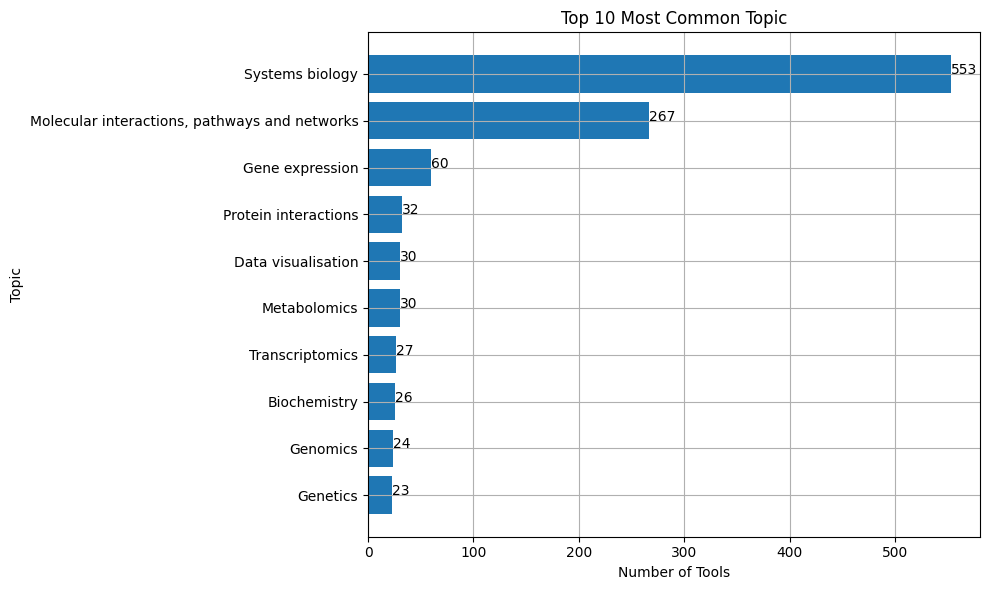

In [64]:
make_bar_graph(topic_list, 'Topic', 10)

In [65]:
display(Markdown(
    f"""

Any additionnal notes can be inserted here.

"""))



Any additionnal notes can be inserted here.



In [66]:
display(HTML('<div style="page-break-after: always;"></div>'))
display(Markdown("---"))
display(Markdown(
    f"""
# Operating System
"""))
mini_report(data['operatingSystem'], False)

---


# Operating System


------------------------------------------------------------
Column name: operatingSystem
------------------------------------------------------------
Total number of tags: 484
Number of empty tags: 69
Percentage of empty tags: 12.48%
------------------------------------------------------------


In [67]:
operatingSystem = data['operatingSystem']

In [68]:
# sort the values inside the operatingSystem column
operatingSystem = operatingSystem.apply(lambda x: sorted(x))

In [69]:
display(Markdown(
    f"""

The bar graph below illustrates the distribution of operating systems associated with '{topic}'.

"""))



The bar graph below illustrates the distribution of operating systems associated with 'Systems biology'.



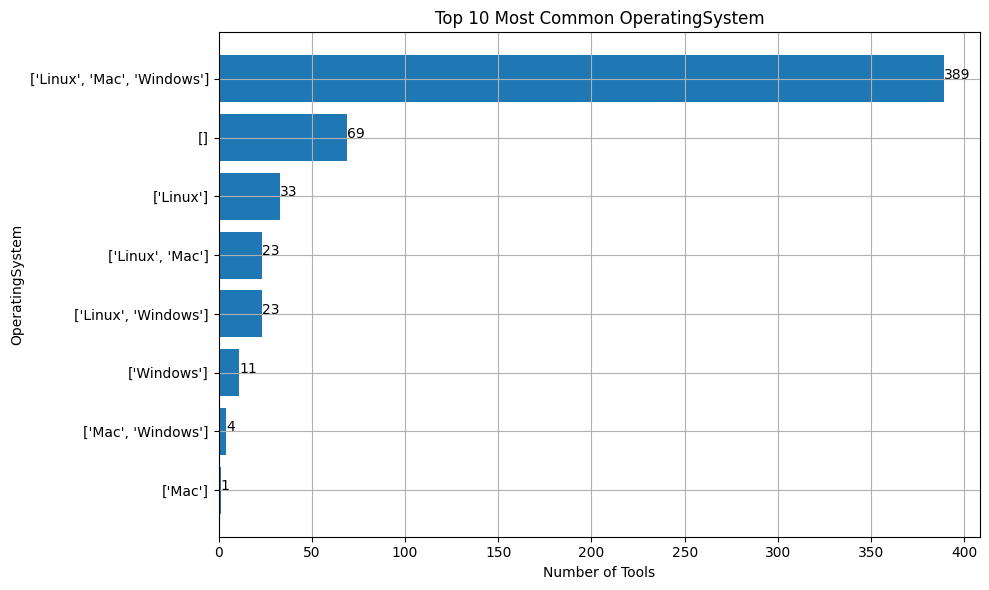

In [70]:
make_bar_graph(operatingSystem, 'OperatingSystem', 10)

In [71]:
operatingSystem = data['operatingSystem']
operatingSystem = operatingSystem[data['operatingSystem'].apply(len)> 0]

In [72]:
operatingSystem_list = [t for tool in operatingSystem for t in tool]

In [73]:
display(Markdown(
    f"""
Furthermore, the bar graph below illustrates the overall distribution of operating systems associated with '{topic}'.
"""))


Furthermore, the bar graph below illustrates the overall distribution of operating systems associated with 'Systems biology'.


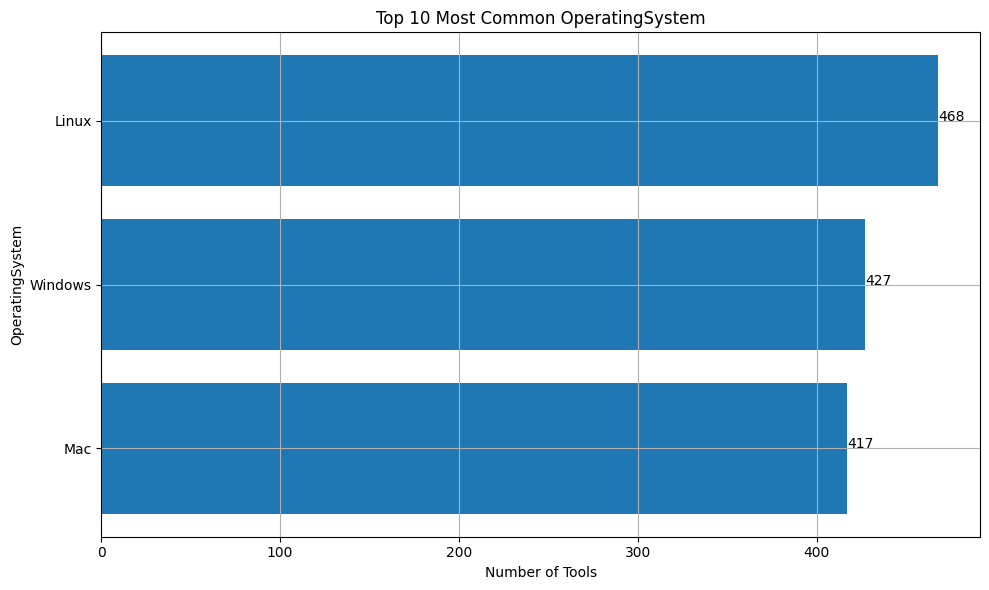

In [74]:
make_bar_graph(operatingSystem_list, 'OperatingSystem', 10)

In [75]:
display(Markdown(
    f"""

Any additionnal notes can be inserted here.

"""))



Any additionnal notes can be inserted here.



In [76]:
display(HTML('<div style="page-break-after: always;"></div>'))
display(Markdown("---"))
display(Markdown(
    f"""
# Language

"""))

mini_report(data['language'], False)

---


# Language



------------------------------------------------------------
Column name: language
------------------------------------------------------------
Total number of tags: 414
Number of empty tags: 139
Percentage of empty tags: 25.14%
------------------------------------------------------------


In [77]:
language = data['language']

In [78]:
language = language[data['language'].apply(len)> 0]

In [79]:
language_list = [t for tool in language for t in tool]

In [80]:
display(Markdown(
    f"""

The bar graph below illustrates the distribution of languages associated with '{topic}'.
"""))



The bar graph below illustrates the distribution of languages associated with 'Systems biology'.


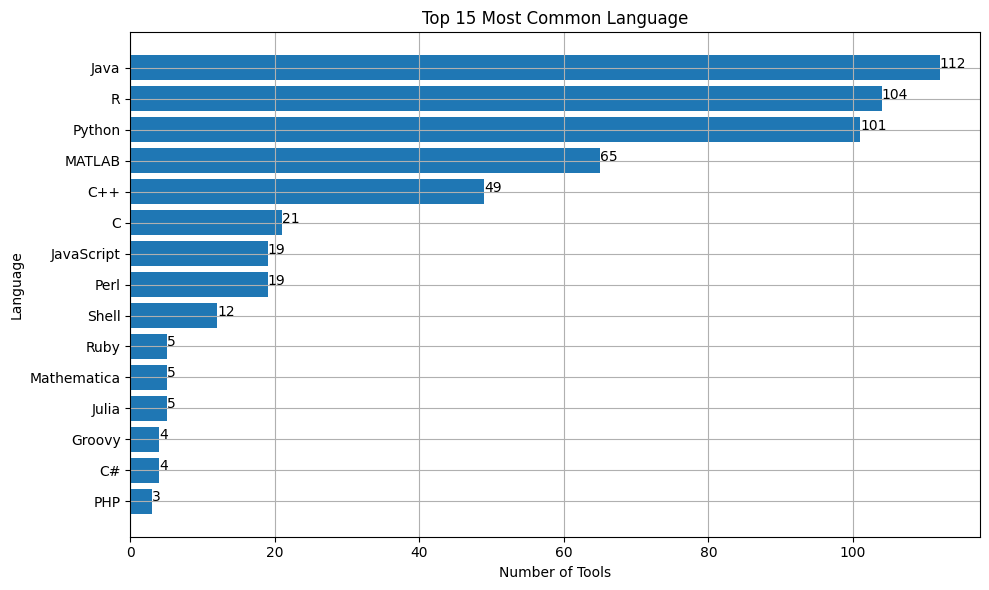

In [81]:
make_bar_graph(language_list, 'Language', 15)

In [82]:
display(Markdown(
    f"""

Any additionnal notes can be inserted here.

"""))



Any additionnal notes can be inserted here.



In [83]:
license = data['license']
license = license.apply(lambda x: [] if x == None else x)

In [84]:
display(HTML('<div style="page-break-after: always;"></div>'))
display(Markdown("---"))
display(Markdown(

    f"""
# License

Its important to note that exist a 'Not licensed ' option available and not being used.


"""))

mini_report(license, False)

---


# License

Its important to note that exist a 'Not licensed ' option available and not being used.




------------------------------------------------------------
Column name: license
------------------------------------------------------------
Total number of tags: 176
Number of empty tags: 377
Percentage of empty tags: 68.17%
------------------------------------------------------------


In [85]:
license = data['license']
license = license[license.apply(lambda x: x != None)]

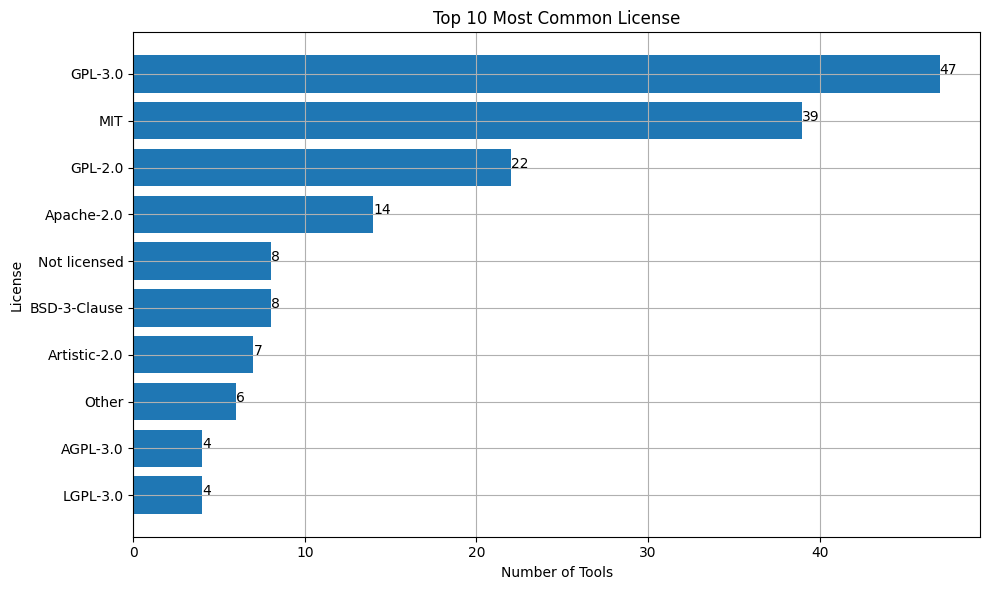

In [86]:
make_bar_graph(license, 'License', 10)

In [87]:
display(Markdown(
    f"""

Any additionnal notes can be inserted here.

"""))



Any additionnal notes can be inserted here.



In [88]:
display(HTML('<div style="page-break-after: always;"></div>'))
display(Markdown("---"))
display(Markdown(
    f"""
# CollectionID

"""))

mini_report(data['collectionID'], False)

---


# CollectionID



------------------------------------------------------------
Column name: collectionID
------------------------------------------------------------
Total number of tags: 104
Number of empty tags: 449
Percentage of empty tags: 81.19%
------------------------------------------------------------


In [89]:
collectionID = data['collectionID']

In [90]:
collectionID = data['collectionID']
collectionID = collectionID[collectionID.apply(lambda x: len(x) > 0)]

In [91]:
collectionID_list = [t for tool in collectionID for t in tool]

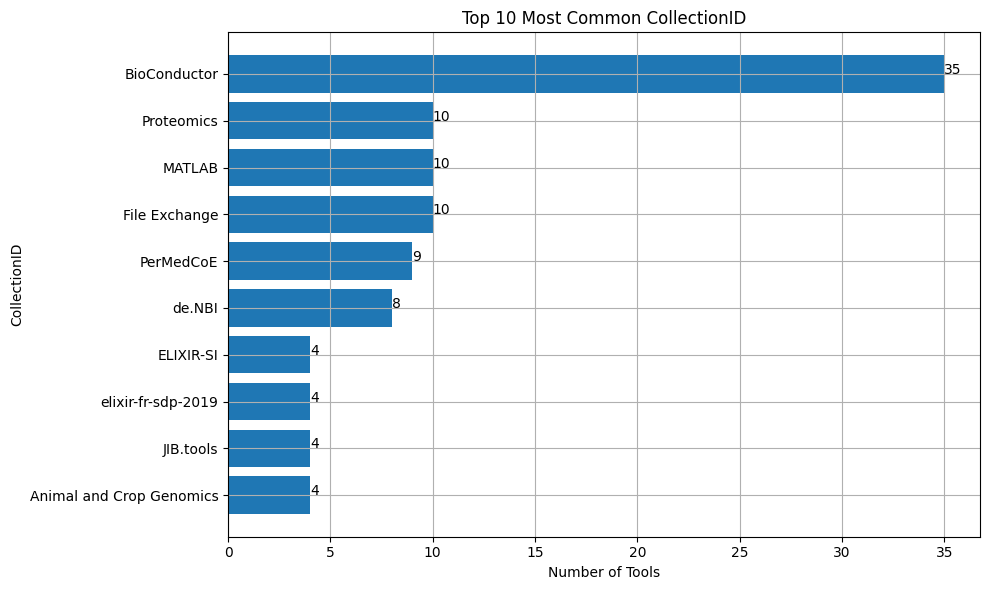

In [92]:
make_bar_graph(collectionID_list, 'CollectionID', 10)

In [93]:
display(Markdown(
    f"""

Any additionnal notes can be inserted here.

"""))



Any additionnal notes can be inserted here.



In [94]:
maturity = data['maturity']
maturity = maturity.apply(lambda x: [] if x == None else x)

In [95]:
display(HTML('<div style="page-break-after: always;"></div>'))
display(Markdown("---"))
display(Markdown(
    f"""
# Maturity

"""))

mini_report(maturity, False)

---


# Maturity



------------------------------------------------------------
Column name: maturity
------------------------------------------------------------
Total number of tags: 64
Number of empty tags: 489
Percentage of empty tags: 88.43%
------------------------------------------------------------


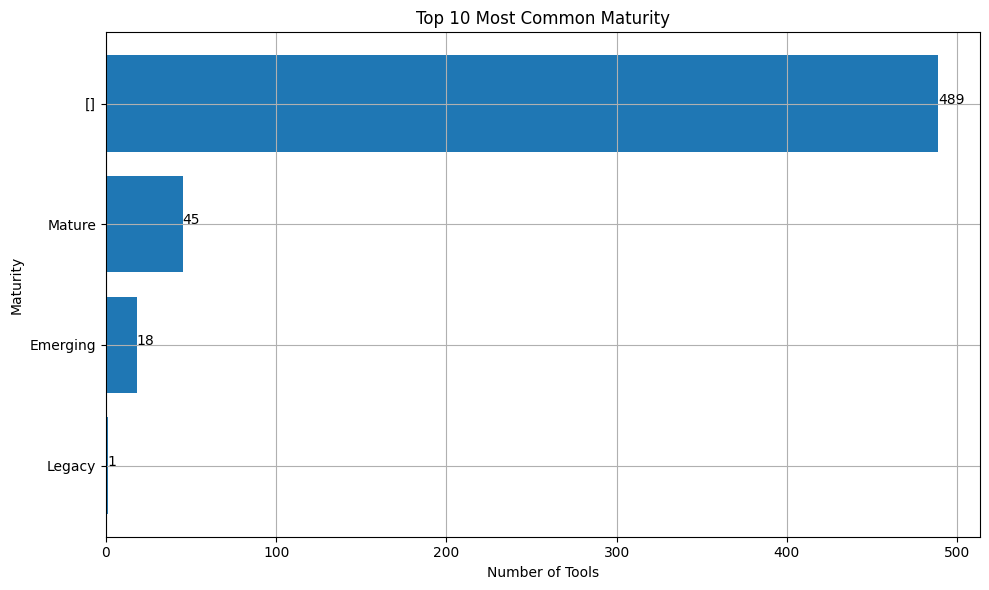

In [96]:
make_bar_graph(maturity, 'Maturity', 10)

In [97]:
display(Markdown(
    f"""

Any additionnal notes can be inserted here.

"""))



Any additionnal notes can be inserted here.



In [98]:
cost = data['cost']
cost = cost.apply(lambda x: [] if x == None else x)

In [99]:
display(HTML('<div style="page-break-after: always;"></div>'))
display(Markdown("---"))
display(Markdown(
    f"""
# Cost
"""))

mini_report(cost, False)

---


# Cost


------------------------------------------------------------
Column name: cost
------------------------------------------------------------
Total number of tags: 112
Number of empty tags: 441
Percentage of empty tags: 79.75%
------------------------------------------------------------


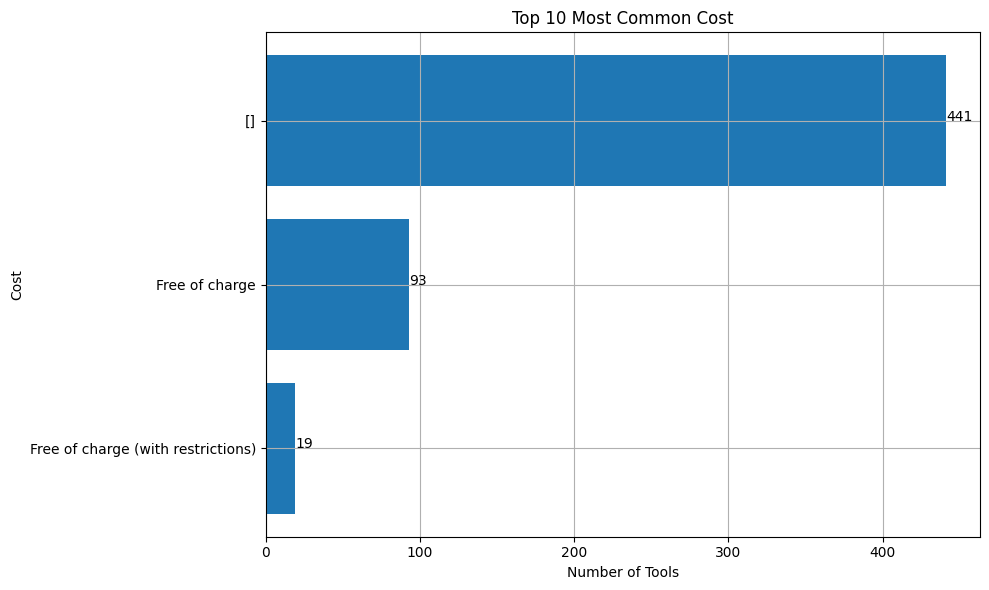

In [100]:
make_bar_graph(cost, 'Cost', 10)

In [101]:
display(Markdown(
    f"""

Any additionnal notes can be inserted here.

"""))



Any additionnal notes can be inserted here.



In [102]:
accessibility = data['accessibility']
accessibility = accessibility.apply(lambda x: [] if x == None else x)

In [103]:
display(HTML('<div style="page-break-after: always;"></div>'))
display(Markdown("---"))
display(Markdown(
    f"""
# Accessibility
"""))

mini_report(accessibility, False)

---


# Accessibility


------------------------------------------------------------
Column name: accessibility
------------------------------------------------------------
Total number of tags: 89
Number of empty tags: 464
Percentage of empty tags: 83.91%
------------------------------------------------------------


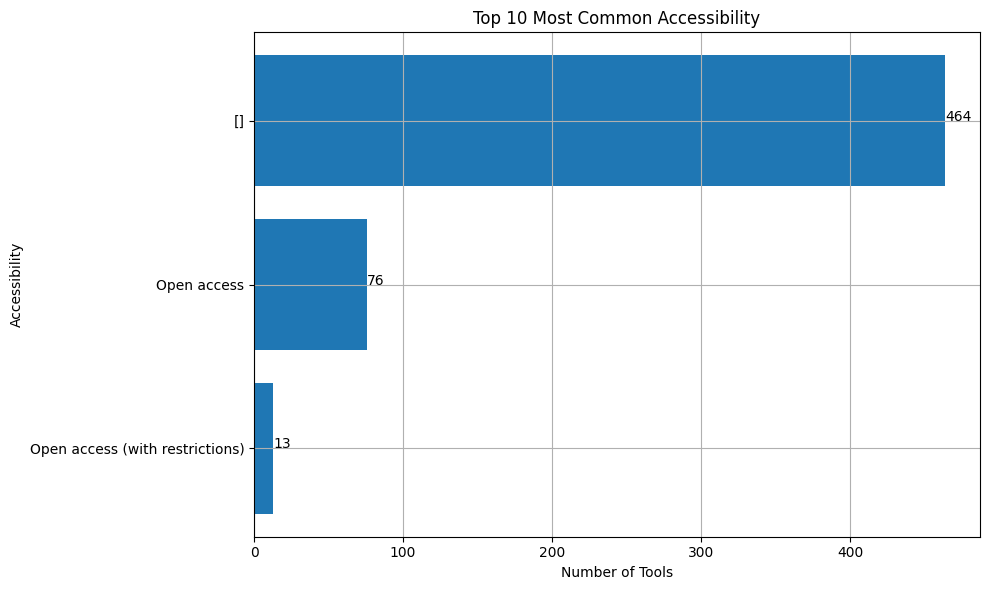

In [104]:
make_bar_graph(accessibility, 'Accessibility', 10)

In [105]:
display(Markdown(
    f"""

Any additionnal notes can be inserted here.

"""))



Any additionnal notes can be inserted here.



In [106]:
display(HTML('<div style="page-break-after: always;"></div>'))
display(Markdown("---"))
display(Markdown(
    f"""
# Elixir Platform
"""))

mini_report(data['elixirPlatform'], False)

---


# Elixir Platform


------------------------------------------------------------
Column name: elixirPlatform
------------------------------------------------------------
Total number of tags: 18
Number of empty tags: 535
Percentage of empty tags: 96.75%
------------------------------------------------------------


In [107]:
elixirPlatform = data['elixirPlatform']

In [108]:
elixirPlatform = data['elixirPlatform']
elixirPlatform = elixirPlatform[elixirPlatform.apply(lambda x: len(x) > 0)]

In [109]:
elixirPlatform_list = [t for tool in elixirPlatform for t in tool]

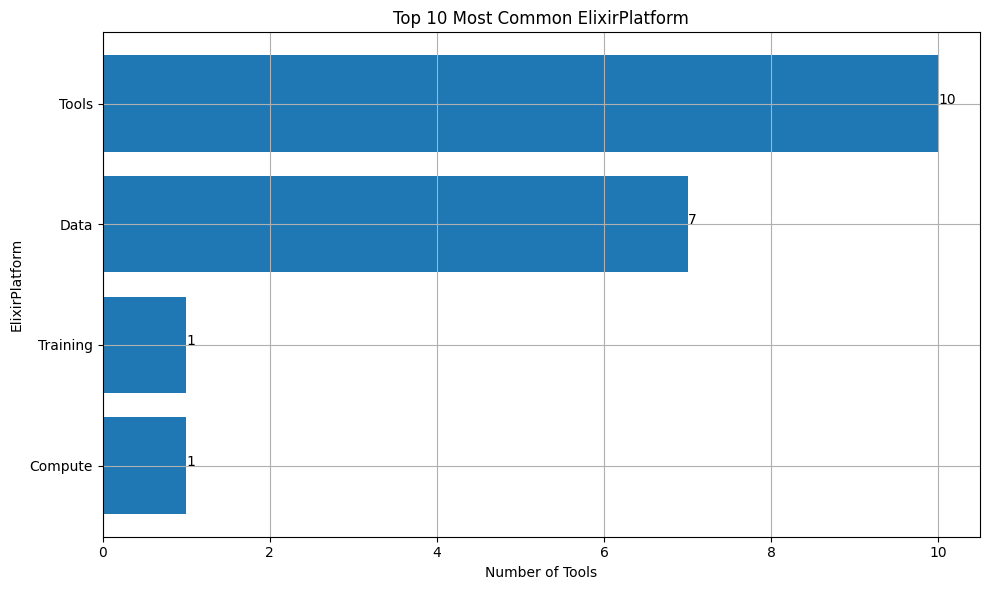

In [110]:
make_bar_graph(elixirPlatform_list, 'ElixirPlatform', 10)

In [111]:
display(Markdown(
    f"""

Any additionnal notes can be inserted here.

"""))



Any additionnal notes can be inserted here.



In [112]:
display(HTML('<div style="page-break-after: always;"></div>'))
display(Markdown("---"))
display(Markdown(
    f"""
# ElixirNode
"""))

mini_report(data['elixirNode'], False)

---


# ElixirNode


------------------------------------------------------------
Column name: elixirNode
------------------------------------------------------------
Total number of tags: 35
Number of empty tags: 518
Percentage of empty tags: 93.67%
------------------------------------------------------------


In [113]:
elixirNode = data['elixirNode']
elixirNode = elixirNode[elixirNode.apply(lambda x: len(x) > 0)]

In [114]:
elixirNode_list = [t for tool in elixirNode for t in tool]

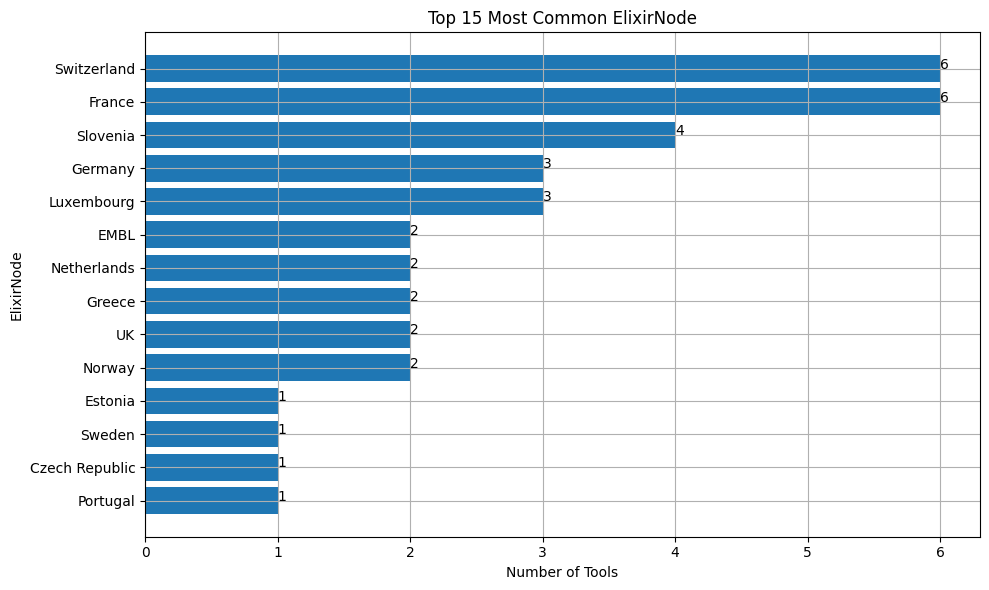

In [115]:
make_bar_graph(elixirNode_list, 'ElixirNode', 15)

In [116]:
display(Markdown(
    f"""

Any additionnal notes can be inserted here.

"""))



Any additionnal notes can be inserted here.



In [117]:
display(HTML('<div style="page-break-after: always;"></div>'))
display(Markdown("---"))
display(Markdown(
    f"""
# ElixirCommunity

"""))
mini_report(data['elixirCommunity'], False)

---


# ElixirCommunity



------------------------------------------------------------
Column name: elixirCommunity
------------------------------------------------------------
Total number of tags: 5
Number of empty tags: 548
Percentage of empty tags: 99.10%
------------------------------------------------------------


In [118]:
elixirCommunity = data['elixirCommunity']
elixirCommunity = elixirCommunity[elixirCommunity.apply(lambda x: len(x) > 0)]

In [119]:
elixirCommunity_list = [t for tool in elixirCommunity for t in tool]

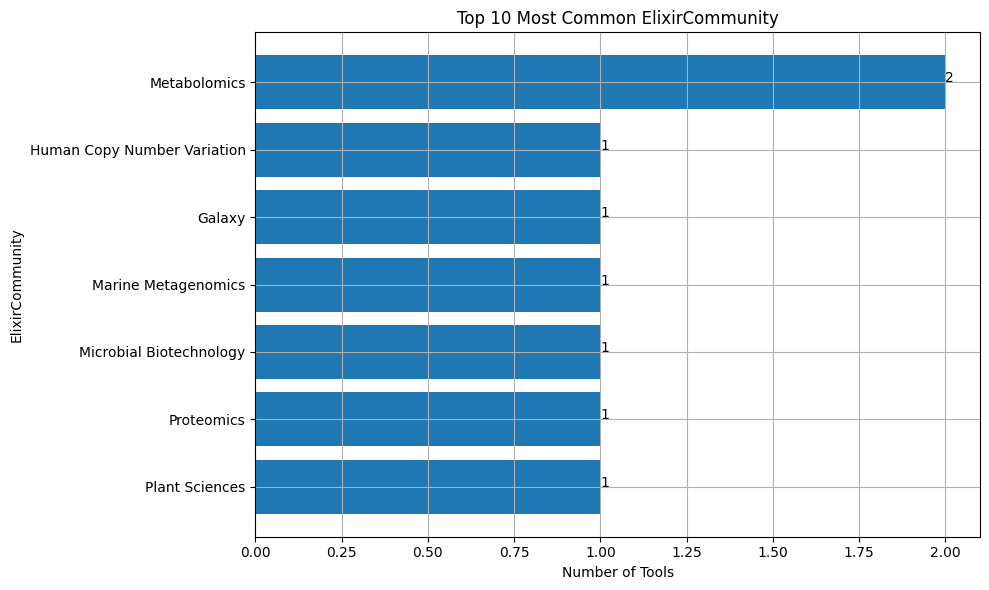

In [120]:
make_bar_graph(elixirCommunity_list, 'ElixirCommunity', 10)

In [121]:
display(Markdown(
    f"""

Any additionnal notes can be inserted here.

"""))



Any additionnal notes can be inserted here.



In [122]:
display(HTML('<div style="page-break-after: always;"></div>'))
display(Markdown("---"))
display(Markdown(
    f"""
# Link
"""))

mini_report(data['link'], False)

---


# Link


------------------------------------------------------------
Column name: link
------------------------------------------------------------
Total number of tags: 376
Number of empty tags: 177
Percentage of empty tags: 32.01%
------------------------------------------------------------


In [123]:
link = data['link']
link = link[link.apply(lambda x: len(x) > 0)]

In [124]:
link_list = [type for tool in link for t in tool for type in t['type']]

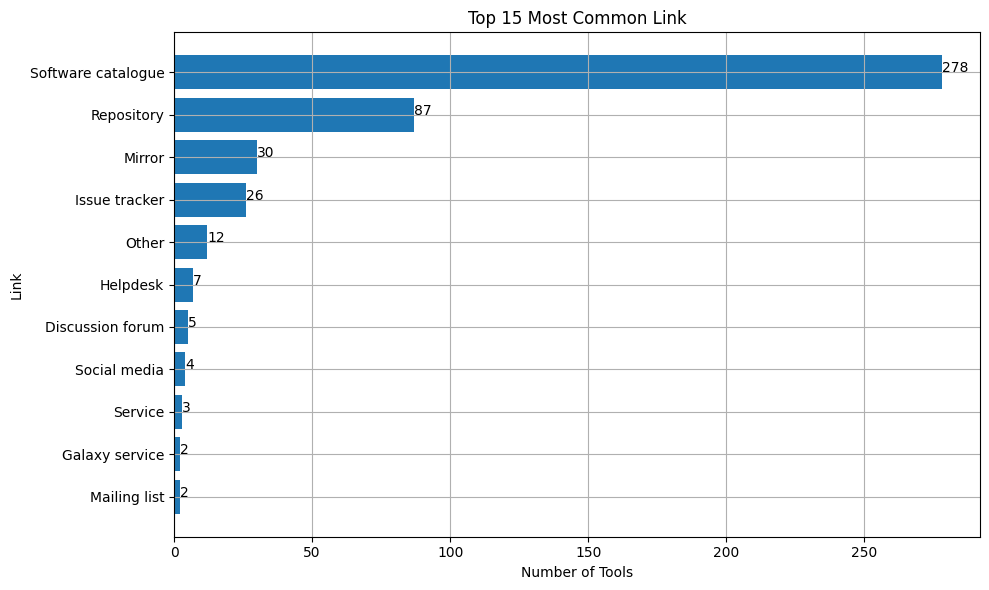

In [125]:
make_bar_graph(link_list, 'Link', 15)

In [126]:
display(Markdown(
    f"""

Any additionnal notes can be inserted here.

"""))



Any additionnal notes can be inserted here.



In [127]:
display(HTML('<div style="page-break-after: always;"></div>'))
display(Markdown("---"))
display(Markdown(
    f"""
# Publication
"""))

mini_report(data['publication'], False)

---


# Publication


------------------------------------------------------------
Column name: publication
------------------------------------------------------------
Total number of tags: 520
Number of empty tags: 33
Percentage of empty tags: 5.97%
------------------------------------------------------------


In [128]:
display(Markdown(
    f"""

Any additionnal notes can be inserted here.

"""))



Any additionnal notes can be inserted here.



In [129]:
publication = data['publication']
publication = publication[publication.apply(lambda x: len(x) > 0)]

In [130]:
display(HTML('<div style="page-break-after: always;"></div>'))
display(Markdown("---"))
display(Markdown(
    f"""
# Download

"""))
mini_report(data['download'], False)

---


# Download



------------------------------------------------------------
Column name: download
------------------------------------------------------------
Total number of tags: 89
Number of empty tags: 464
Percentage of empty tags: 83.91%
------------------------------------------------------------


In [131]:
download = data['download']
download = download[download.apply(lambda x: len(x) > 0)]

In [132]:
download_list = [t['type'] for tool in download for t in tool ]

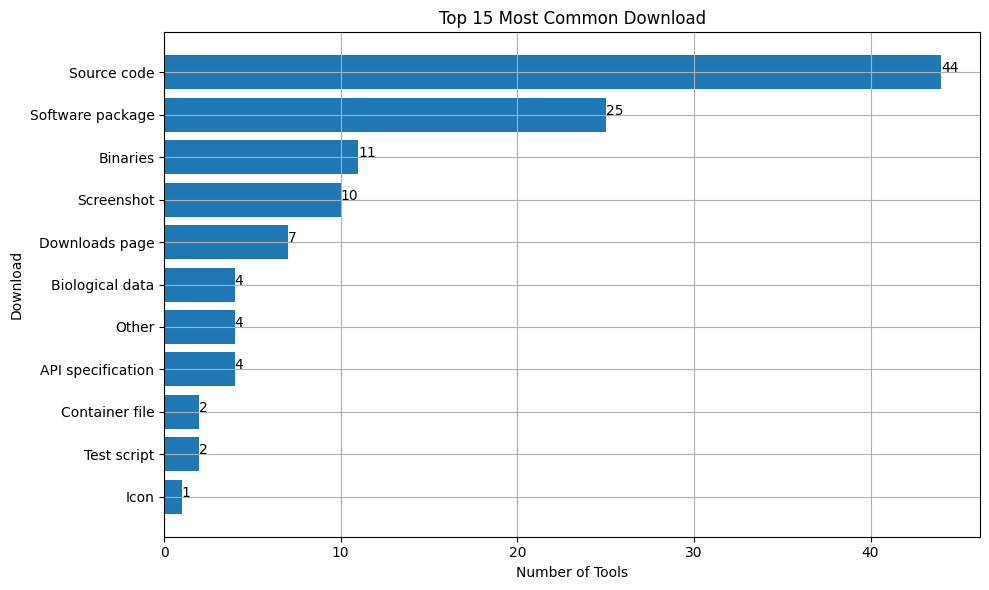

In [133]:
make_bar_graph(download_list, 'Download', 15)

In [134]:
display(Markdown(
    f"""

Any additionnal notes can be inserted here.

"""))



Any additionnal notes can be inserted here.



In [135]:
display(HTML('<div style="page-break-after: always;"></div>'))
display(Markdown("---"))
display(Markdown(
    f"""
# Documentation
"""))

mini_report(data['documentation'], False)

---


# Documentation


------------------------------------------------------------
Column name: documentation
------------------------------------------------------------
Total number of tags: 450
Number of empty tags: 103
Percentage of empty tags: 18.63%
------------------------------------------------------------


In [136]:
documentation = data['documentation']

In [137]:
documentation = documentation[documentation.apply(lambda x: len(x) > 0)]

In [138]:
documentation_list = [type for tool in documentation for t in tool for type in t['type']]

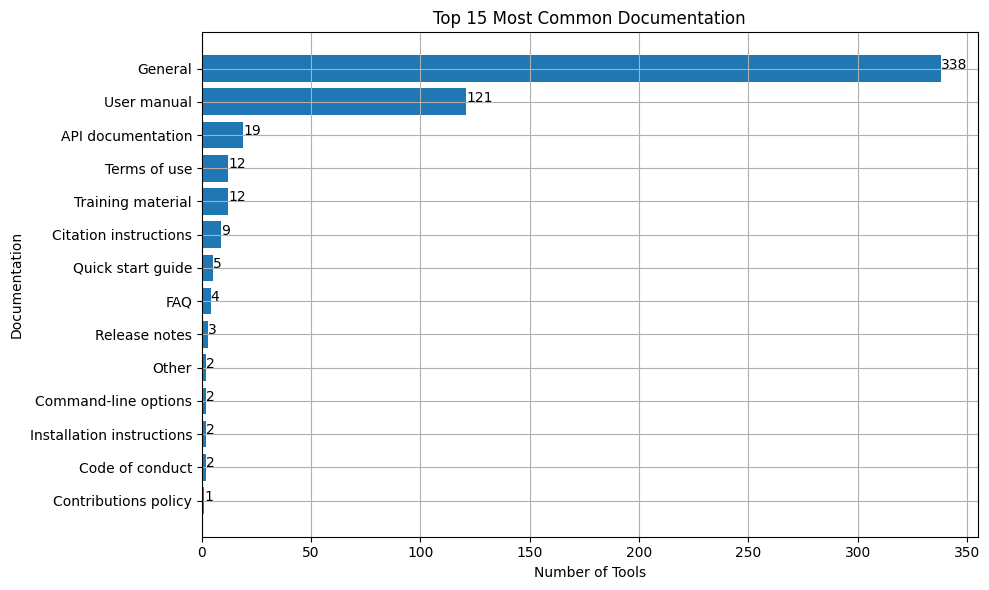

In [139]:
make_bar_graph(documentation_list, 'Documentation', 15)

In [140]:
display(Markdown(
    f"""

Any additionnal notes can be inserted here.

"""))



Any additionnal notes can be inserted here.



In [141]:
display(HTML('<div style="page-break-after: always;"></div>'))
display(Markdown("---"))
display(Markdown(
    f"""
# Credit

"""))
mini_report(data['credit'], False)

---


# Credit



------------------------------------------------------------
Column name: credit
------------------------------------------------------------
Total number of tags: 535
Number of empty tags: 18
Percentage of empty tags: 3.25%
------------------------------------------------------------


In [142]:
credit = data['credit']
credit = credit[credit.apply(lambda x: len(x) > 0)]

In [143]:
credit_list = [t['typeEntity'] for tool in credit for t in tool ]

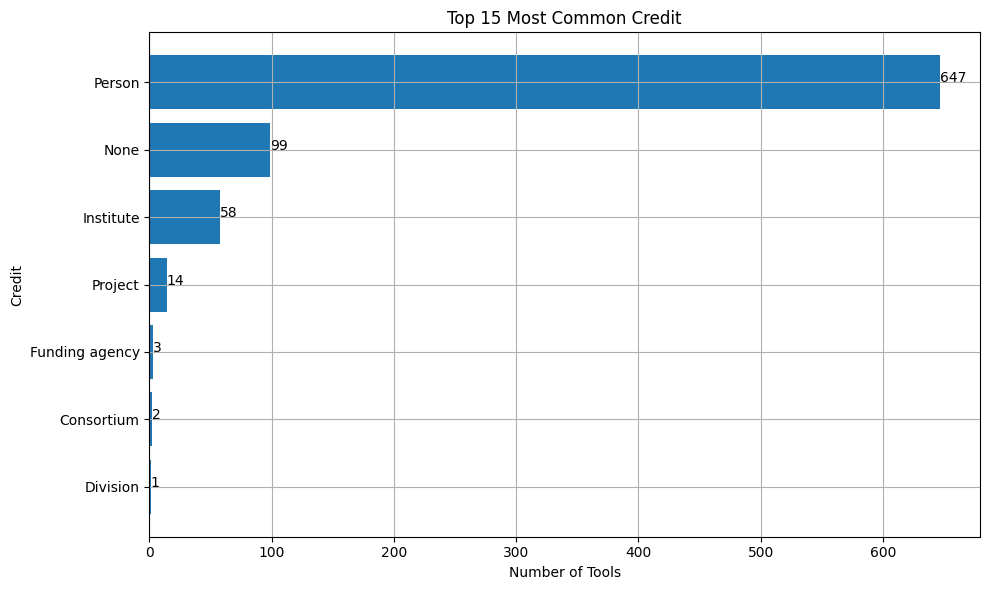

In [144]:
make_bar_graph(credit_list, 'Credit', 15)

In [145]:
display(Markdown(
    f"""

Any additionnal notes can be inserted here.

"""))



Any additionnal notes can be inserted here.



In [146]:
display(HTML('<div style="page-break-after: always;"></div>'))
display(Markdown("---"))
display(Markdown(
    f"""
# Owner

"""))
mini_report(data['owner'], False)

---


# Owner



------------------------------------------------------------
Column name: owner
------------------------------------------------------------
Total number of tags: 553
Number of empty tags: 0
Percentage of empty tags: 0.00%
Number of unique tags: 85
------------------------------------------------------------


In [147]:
owner = data['owner']
owner = owner[owner.apply(lambda x: len(x) > 0)]

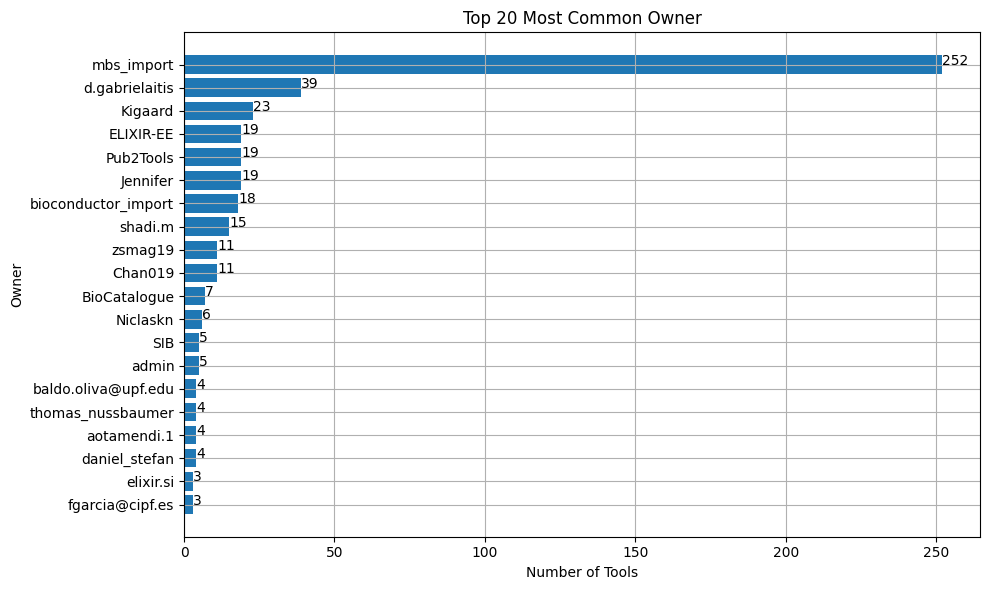

In [148]:
make_bar_graph(owner, 'Owner', 20)

In [149]:
display(Markdown(
    f"""

Any additionnal notes can be inserted here.

"""))



Any additionnal notes can be inserted here.



In [150]:
display(HTML('<div style="page-break-after: always;"></div>'))
display(Markdown("---"))
display(Markdown(
    f"""
# Addition Date
"""))

mini_report(data['additionDate'], False)

---


# Addition Date


------------------------------------------------------------
Column name: additionDate
------------------------------------------------------------
Total number of tags: 553
Number of empty tags: 0
Percentage of empty tags: 0.00%
Number of unique tags: 541
------------------------------------------------------------


In [151]:
additionDate = data['additionDate']

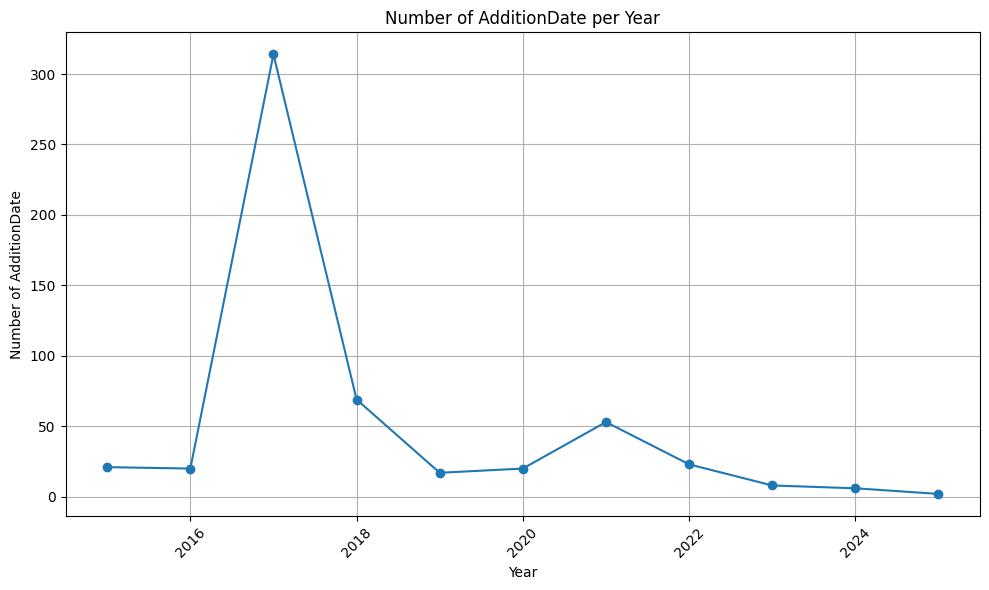

In [152]:
make_time_evolution_graph_per_year(additionDate, 'AdditionDate')

In [153]:
display(Markdown(
    f"""

Any additionnal notes can be inserted here.

"""))



Any additionnal notes can be inserted here.



In [154]:
display(HTML('<div style="page-break-after: always;"></div>'))
display(Markdown("---"))
display(Markdown(
    f"""
# LastUpdate
"""))

mini_report(data['lastUpdate'], False)

---


# LastUpdate


------------------------------------------------------------
Column name: lastUpdate
------------------------------------------------------------
Total number of tags: 553
Number of empty tags: 0
Percentage of empty tags: 0.00%
Number of unique tags: 506
------------------------------------------------------------


In [155]:
lastUpdate = data['lastUpdate']

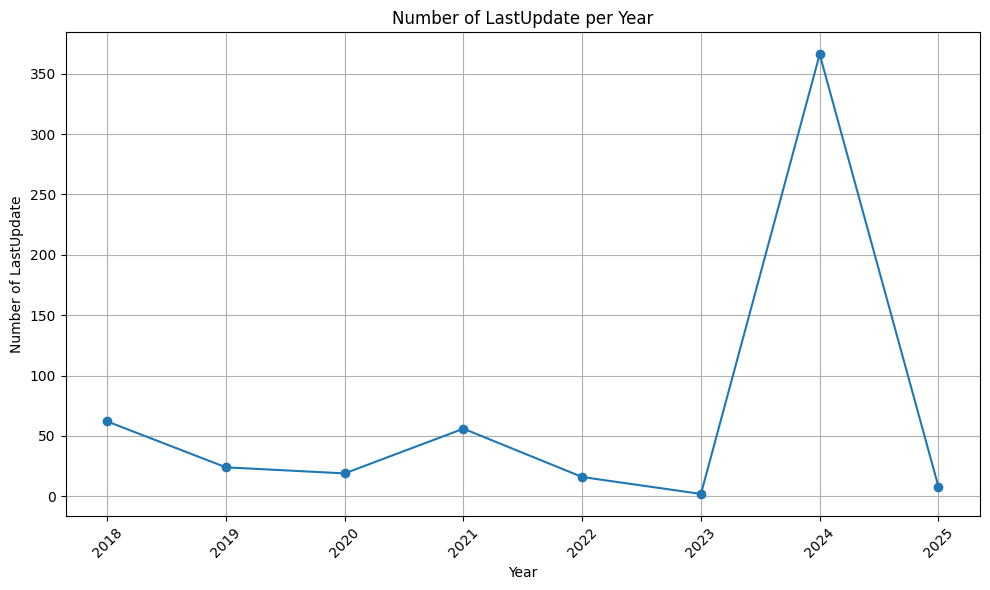

In [156]:
make_time_evolution_graph_per_year(lastUpdate, 'LastUpdate')

In [157]:
display(Markdown(
    f"""

Any additionnal notes can be inserted here.

"""))



Any additionnal notes can be inserted here.



In [158]:
display(HTML('<div style="page-break-after: always;"></div>'))
display(Markdown("---"))
display(Markdown(
    f"""

# EditPermission

"""))
mini_report(data['editPermission'], False)

---



# EditPermission



------------------------------------------------------------
Column name: editPermission
------------------------------------------------------------
Total number of tags: 553
Number of empty tags: 0
Percentage of empty tags: 0.00%
------------------------------------------------------------


In [159]:
editPermission = data['editPermission']

In [160]:
editPermission_df = editPermission.apply(lambda x: pd.Series(x))

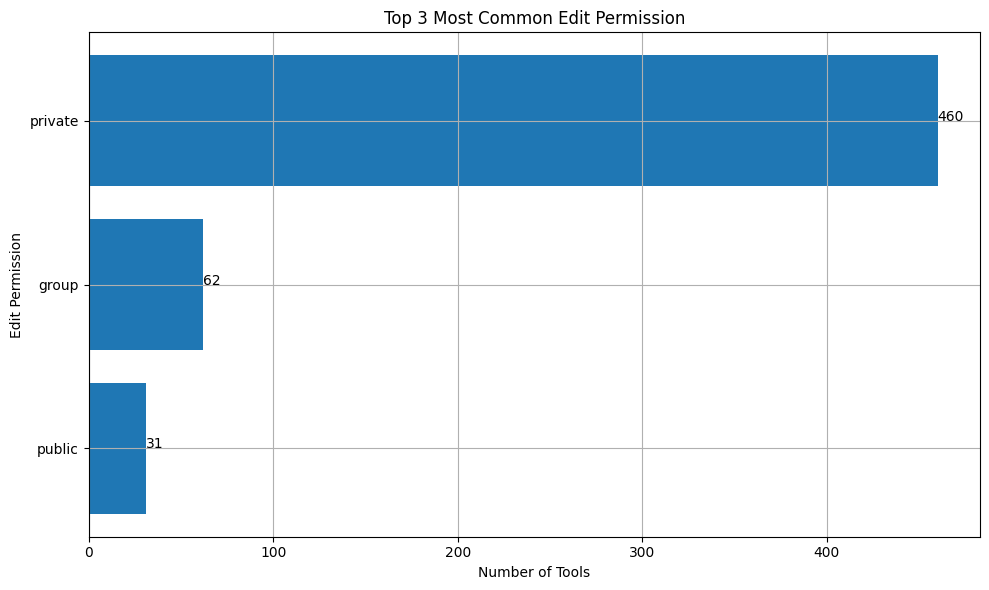

In [161]:
make_bar_graph(editPermission_df['type'], 'Edit Permission', 3)

In [162]:
editPermission_df_autors = editPermission_df[editPermission_df['authors'].apply(lambda x: len(x) > 0)]

In [163]:
editPermission_df_autors_list = [t for tool in editPermission_df_autors['authors'] for t in tool]

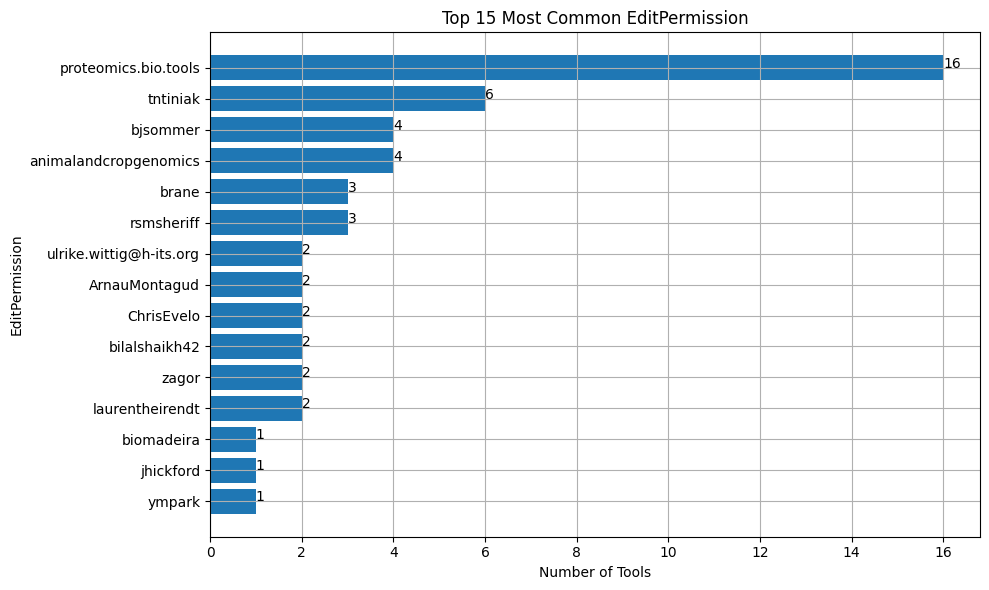

In [164]:
make_bar_graph(editPermission_df_autors_list, 'EditPermission', 15)

In [165]:
display(HTML('<div style="page-break-after: always;"></div>'))
display(Markdown("---"))
display(Markdown(
    f"""
    
# Validated

"""))



---


    
# Validated



In [166]:
validated = data['validated']

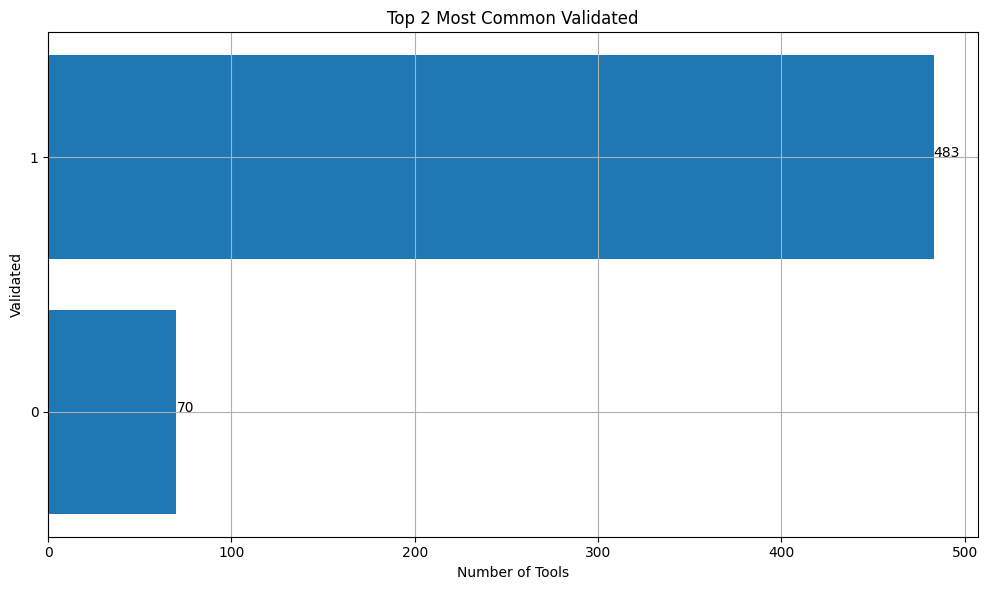

In [167]:
make_bar_graph(validated, 'Validated', 2)

In [168]:
homepage_status = data['homepage_status']

In [169]:
display(HTML('<div style="page-break-after: always;"></div>'))
display(Markdown("---"))
display(Markdown(
    f"""
# Homepage Status
"""))


---


# Homepage Status


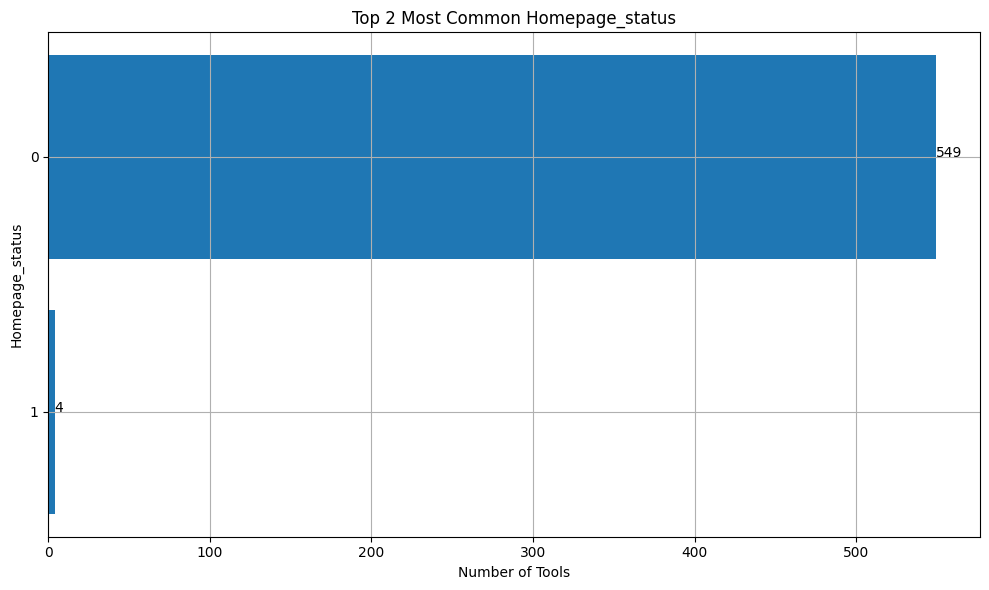

In [170]:
make_bar_graph(homepage_status, 'Homepage_status', 2)

In [171]:
display(HTML('<div style="page-break-after: always;"></div>'))
display(Markdown("---"))
display(Markdown(
    f"""
# Elixir_badge
"""))


---


# Elixir_badge


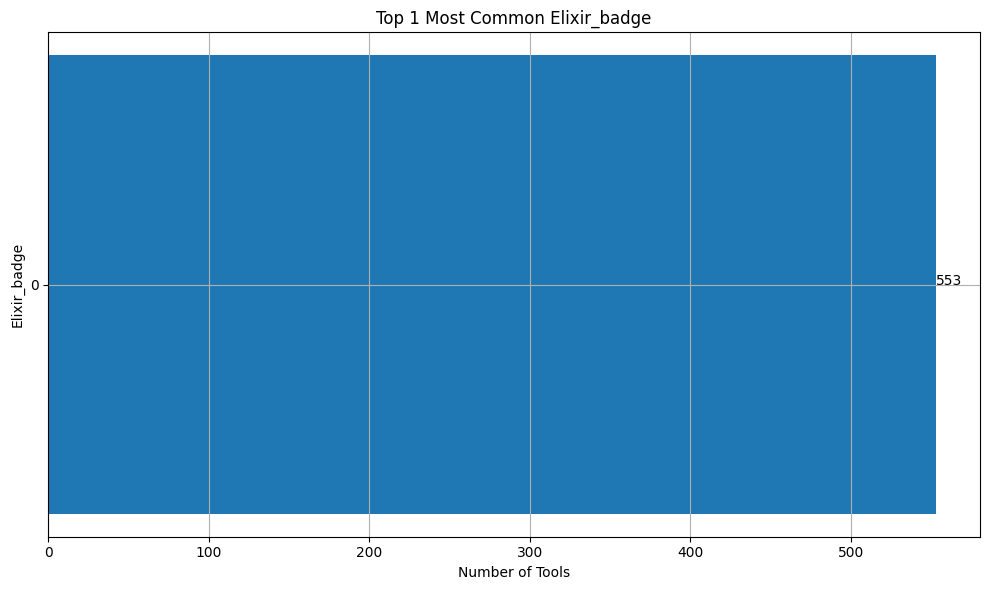

In [172]:
elixir_badge = data['elixir_badge']
make_bar_graph(elixir_badge, 'Elixir_badge', 1)

In [173]:
display(HTML('<div style="page-break-after: always;"></div>'))
display(Markdown("---"))
display(Markdown(
    f"""
# Confidence Flag

"""))



---


# Confidence Flag



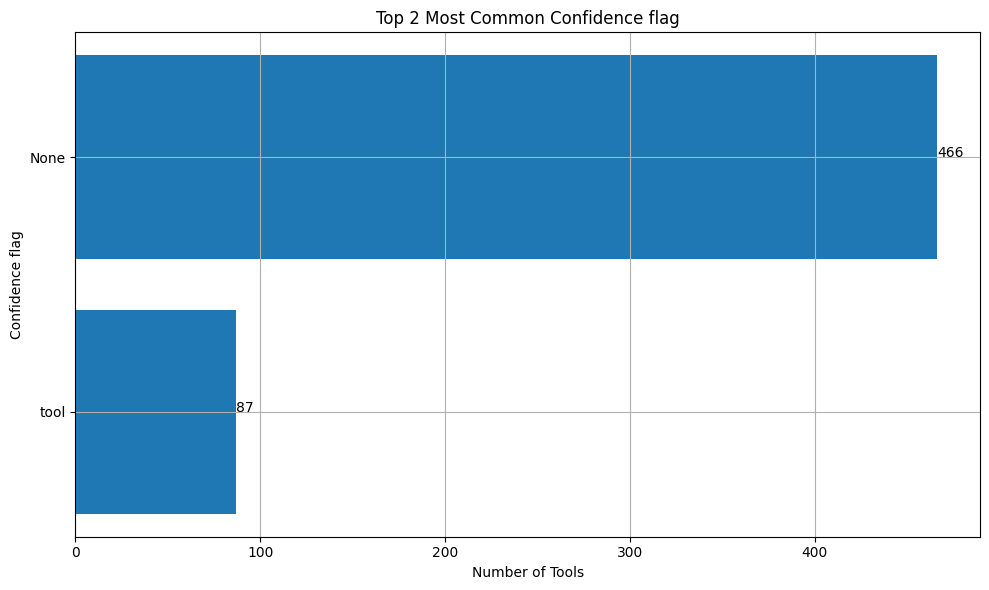

In [174]:
confidence_flag = data['confidence_flag']
make_bar_graph(confidence_flag, 'Confidence flag', 2)